In [18]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import urllib

In [5]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
urllib.request.urlretrieve(url, "Covid19.xlsx")
covid = pd.read_excel('Covid19.xlsx')

In [7]:
covid_GB_country=covid.groupby('countriesAndTerritories')
country_list=list(covid['countriesAndTerritories'].unique())
covid_countries={}
for country in country_list:
    covid_countries[country]=covid_GB_country.get_group(country)
    covid_countries[country]=covid_countries[country].set_index('dateRep')

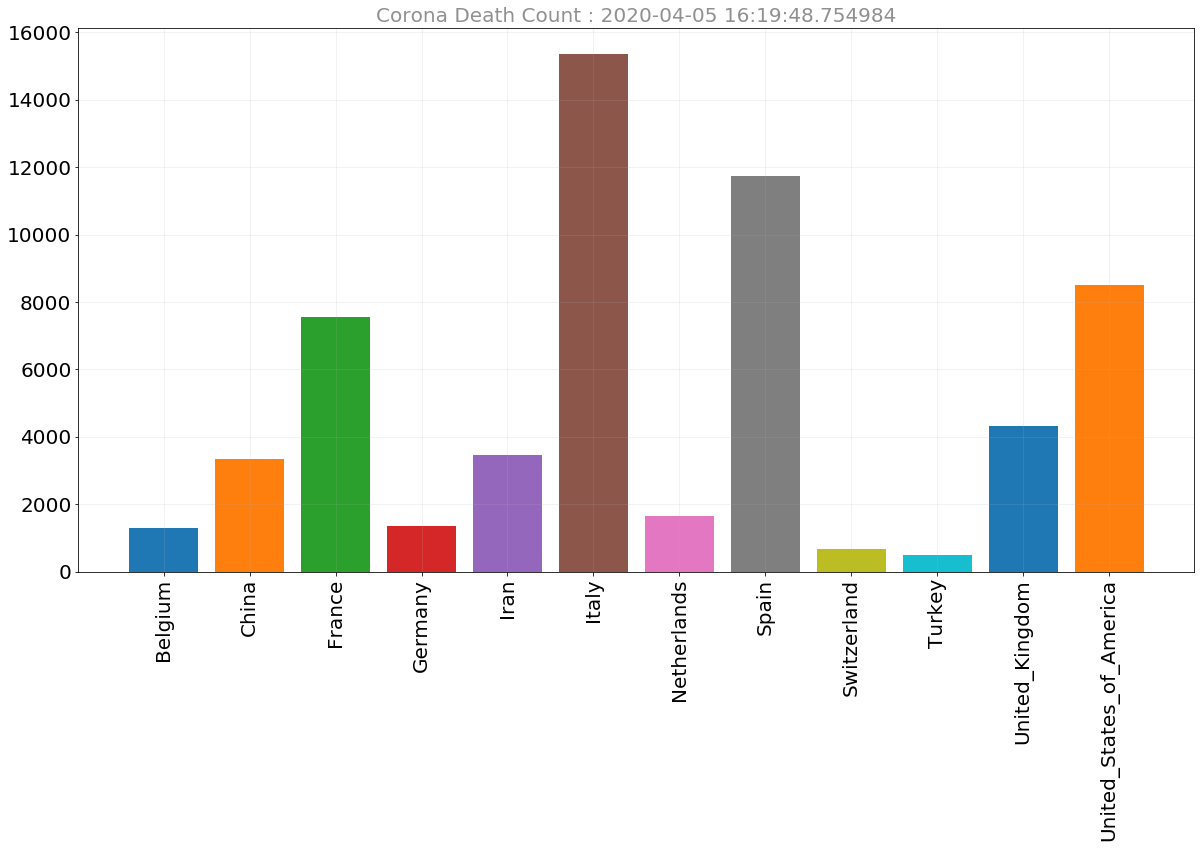

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize = (20,10))
#plt.figure(figsize=(20,5))

#plt.style('seaborn')
ax = plt.gca()
ax.tick_params(axis='x', colors='black',rotation=90)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['text.color'] = '#909090'

for country in country_list:
     if covid_countries[country]['deaths'].sum() > 500:
        ax.bar(country,covid_countries[country]['deaths'].sum(),label=country )


plt.title('Corona Death Count : ' + str(datetime.now()) ,size=20) 
plt.grid(alpha=0.2)
plt.show() 
plt.tight_layout()